# Принятие решений в бизнесе

### Описание проекта

<p></p>
<b>Наш заказчик</b> - крупный интернет-магазин.
Предоставлено 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort, а также результаты проведенного A/B-теста. 
<b>Задача:</b> приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.
    
***Цели Исследования:***
- ознакомиться с данными и выполнить их предобработку(имена колонок, типы данных, пропуски) 
- провести исследовательский анализ данных
- провести приоритезацию гипотез:
   - применив ICE
   - применив RICE
   - сравнить результаты
- провести A/B-тест:
   - график кумулятивной выручки по группам
   - график кумулятивного среднего чека по группам
   - график относительного изменения кумулятивного среднего чека группы B к группе A
   - график кумулятивного среднего количества заказов на посетителя по группам
   - график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
   - точечный график количества заказов по пользователям. 
   - расчет 95-го и 99-го перцентиля количества заказов на пользователя, выбор границы аномальных пользователей
   - точечный график стоимостей заказов
   - расчет 95-го и 99-го перцентиля стоимости заказов, выбор границы аномальных пользователей
   - расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным
   - расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным
   - расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
   - расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным
- зафиксировать основной вывод и принять решение:
   - Остановить тест, зафиксировать победу одной из групп
   - Остановить тест, зафиксировать отсутствие различий между группами
   - Продолжить тест

### Описание данных: 

<p></p>
<div style="border:solid black 1px; padding: 20px">
Предоставлены данные по 9 гипотезам и результатам А/В тестов.<br> 
    Каждая гипотеза описана 5 признаками - название гипотезы, параметры Reach(охват), Impact(влияние), Confidence(уверенность), Efforts(цена). Оценка параметров идет по 10-бальной шкале.<br>
    О результатах теста нам известно, что в тесте принимали участие две группы, всего 1031 человек. Длительность теста - 1 месяц, с 1 августа 2019 по 31 августа 2019. Есть данные о идентификаторе заказа и пользователя, выручке заказа, количестве пользователей в тестируемой группе.<br>
    </div>

## Импорт данных и изучение общей информации

In [1]:
# импорт библиотек 
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
import datetime as dt
from scipy import stats as st
import math as mth

In [2]:
# чтение csv-файлов
hypothesis, orders, visitors = (
    pd.read_csv('/datasets/hypothesis.csv', sep=','),
    pd.read_csv('/datasets/orders.csv', sep=','),
    pd.read_csv('/datasets/visitors.csv', sep=',')
    )

In [3]:
# сброс ограничений на количество и ширину столбцов
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [4]:
# функция для знакомства с данными
def get_info(df, n):
    return (
            df.info(),
            display(df.head(n)),
            display(df.duplicated().sum()),
            )


# вывод основной информации visits
display(get_info(hypothesis, 9))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


0

(None, None, None)

In [5]:
# вывод основной информации orders
get_info(orders, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


0

(None, None, None)

In [6]:
# вывод основной информации visitors
get_info(visitors, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


0

(None, None, None)

*Пропусков в столбцах и явных дубликатов нет, но следует изменить названия колонок и тип данных в столбцах с датами.*

In [7]:
# функция переименования названий колонок
def change_name(df):
    df.columns = [x.replace('Id', '_id').lower() for x in df.columns]
    return df.info()

change_name(hypothesis)
change_name(orders)
change_name(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns)

In [8]:
# изменение типа данных
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [9]:
# изучение состава групп
print(f'Общее число участников теста: {orders["visitor_id"].nunique()} человек')
print('В группе А приняло участие', orders.query('group=="A"')['visitor_id'].nunique(), 'человека')
print('В группе B приняло участие', orders.query('group=="B"')['visitor_id'].nunique(), 'человек')

print(len(set(orders.query('group=="A"')["visitor_id"])\
& set (orders.query('group=="B"')['visitor_id'])), 'человек встречается в обеих группах')

Общее число участников теста: 1031 человек
В группе А приняло участие 503 человека
В группе B приняло участие 586 человек
58 человек встречается в обеих группах


#### Вывод после предобработки данных: 

<div style="border:solid pink 5px; padding: 20px">
<li>Мы выгрузили три датафрейма и присвоили переменным, импортировали необходимые библиотеки для дальнейшей работы. Далее изучили общую информацию о данных.
<li>Во всех датафреймах отсутствуют пропуски. </li>    
<li>Были обработаны имена столбцов во всех датафреймах: приведены к одному стилю.</li>
<li>В столбцах, содержащих даты, был изменен тип данных на datetime, так как он необходим для проведения дальнейших исследований.</li> 
<li>Дубликаты в таблицах обнаружены не были.</li>    
<li>В тесте приняли участие 1031 человек. Мы видим пересечение пользователей, но исключить дубликаты нет возможности из-за отсутствия id в таблице visitors.</li>     
</div> 

## Приоритезация гипотез

### фреймворк ICE

In [10]:
# расчет ICE
hypothesis['ICE'] =\
          round((hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts'],3)

hypothesis.sort_values(by='ICE', ascending=False, inplace=True)
hypothesis[['hypothesis', 'ICE']]

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


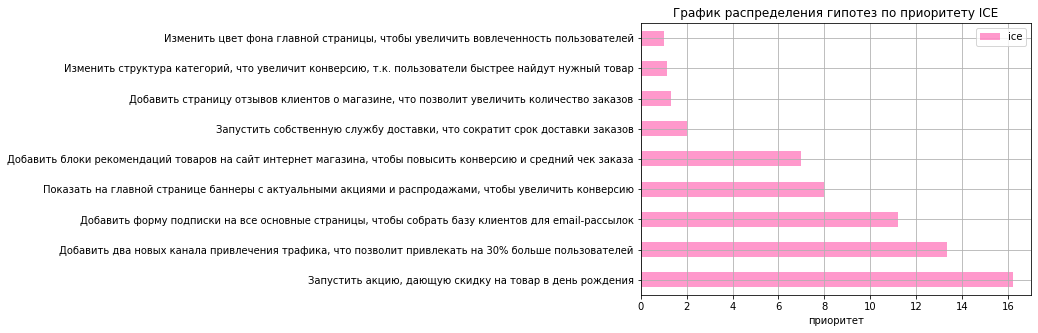

In [11]:
# создание графика распределения гипотез по приоритету
fig, ax = plt.subplots(figsize=(7, 5))
hypothesis[['hypothesis', 'ICE']].set_index('hypothesis')\
               .plot(kind='barh', ax=ax, color={'#ff0080'}, alpha=0.4) 
ax.legend(['ice'])
ax.grid(True)
ax.set_xlabel('приоритет')
ax.set_ylabel('')
ax.set_title('График распределения гипотез по приоритету ICE')
plt.show()

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
    Наиболее перспективные гипотезы - 8, 0, 7. Следующая группа по уменьшению важности - 6, 2. На графике визуально можно ознакомиться с тем, какие именно гипотезы стоит тестировать в первую очередь. Гипотезы, которые сильнее всего повлияют на пользователей, их опыт и удовлетворение от продукта
    </div>

### фреймворк RICE

In [12]:
# расчет RICE
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])\
                      /hypothesis['efforts']

hypothesis.sort_values(by='RICE', ascending=False, inplace=True)
hypothesis[['hypothesis','RICE']]

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


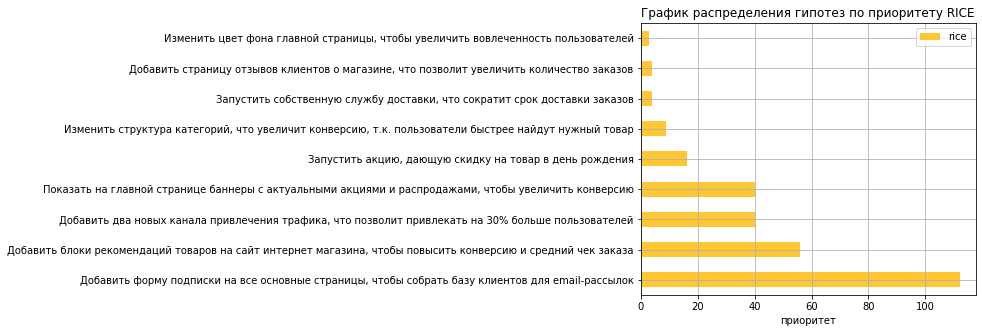

In [13]:
# создание графика распределения гипотез по приоритету
fig, ax = plt.subplots(figsize=(6, 5))
hypothesis[['hypothesis', 'RICE']].set_index('hypothesis')\
               .plot(kind='barh', ax=ax, color={'#ffba00'}, alpha=0.8) 
ax.legend(['rice'])
ax.grid(True)
ax.set_xlabel('приоритет')
ax.set_ylabel('')
ax.set_title('График распределения гипотез по приоритету RICE')
plt.show()

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
    Наиболее перспективные гипотезы - 7, 2, 0, 6, 8. На графике визуально можно ознакомиться с тем, какие именно гипотезы стоит тестировать в первую очередь.
    </div>

### как изменилась приоритизация гипотез 

In [14]:
# создание таблицы
hypothesis_rice = hypothesis[['RICE']]
hypothesis_rice.reset_index(drop= False , inplace= True)
hypothesis_rice.columns = ['hip_rice', 'RICE']

hypothesis_ice = hypothesis.sort_values(by='ICE', ascending=False)[['ICE']]
hypothesis_ice.reset_index(drop= False , inplace= True)
hypothesis_ice.columns = ['hip_ice', 'RICE']

pd.concat([hypothesis_ice['hip_ice'], hypothesis_rice['hip_rice']], axis=1)

,hip_ice,hip_rice
0,8,7
1,0,2
2,7,0
3,6,6
4,2,8
5,1,3
6,5,1
7,3,5
8,4,4


<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
<li>В таблице представлена приотизация гипотез в зависимости от использованного фреймворка.</li>  
<li>Топ-5 приоритетных гипотез не изменился - 0, 2, 6, 7, 8; но внутри этой пятерки разная последовательность. Так, например, 8 гипотеза с первого места сместилась на пятое, а 2 гипотеза с пятого места поднялась на второе, 7 - с третьего на первое.</li>  
<li>Это связано с показателем Reach. У гипотез 7 и 2 этот показатель равен 10 и 8 соответственно, тогда как у 8 гипотезы показатель наименьший - 1. Один фреймворк(Rice) учитывает скольких пользователей затронет изменение, которое мы хотим внести, другой(Ice) - нет.</li>
    </div>

## Анализ A/B-теста

In [15]:
# создание уникальных пар дат и групп теста
date_groups = orders[['date','group']].drop_duplicates()

# агрегирование кумулятивных по дням данных о заказах 
orders_agg = date_groups\
            .apply(lambda x:orders[np.logical_and(orders['date'] <= x['date'], 
                                                  orders['group'] == x['group'])]\
            .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique',
                  'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)\
            .sort_values(by=['date','group'])

# агрегирование кумулятивных по дням данных о посетителях интернет-магазина 
visitors_agg = date_groups\
              .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                       visitors['group'] == x['group'])]\
              .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
              .sort_values(by=['date','group'])

# объединение кумулятивных данных в одной таблице
date_cumulative = orders_agg.merge(visitors_agg, 
                                   on=['date', 'group'], 
                                   )
date_cumulative.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# расчет среднего количества заказов на посетителя
date_cumulative['conversion'] = round(date_cumulative['orders']/date_cumulative['visitors'],3)


print(date_cumulative.head()) 


        date group  orders  buyers  revenue  visitors  conversion
0 2019-08-01     A      24      20   148579       719       0.033
1 2019-08-01     B      21      20   101217       713       0.029
2 2019-08-02     A      44      38   242401      1338       0.033
3 2019-08-02     B      45      43   266748      1294       0.035
4 2019-08-03     A      68      62   354874      1845       0.037


### график кумулятивной выручки по группам

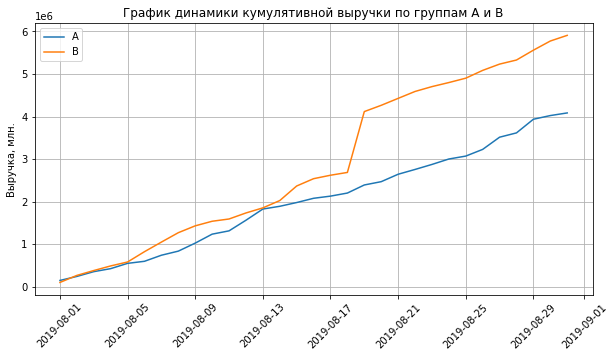

In [16]:
# датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням в разрезе групп
orders_A = date_cumulative[date_cumulative['group']=='A'][['date', 'revenue', 
                                                           'orders', 'conversion']]
orders_B = date_cumulative[date_cumulative['group']=='B'][['date', 'revenue', 
                                                           'orders', 'conversion']]

# график выручки группы А
fig, axes = plt.subplots(figsize=(10,5))
plt.plot(orders_A['date'], orders_A['revenue'], label='A')

# график выручки группы B
plt.plot(orders_B['date'], orders_B['revenue'], label='B')

plt.title('График динамики кумулятивной выручки по группам А и В')
plt.ylabel("Выручка, млн.")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
<li>Выручка увеличивается в течение всего теста у обеих групп линейно. Это положительная динамика, причем выручка у группы В больше, чем в группе А, на протяжении всего теста.</li>
<li>График выручки группы А растет равномерно, стабильно.</li>
<li>Однако график выручки групп В имеет резкую точку роста 19 августа. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Возможно, в группе есть выбросы, надо провести исследование.</li>
    </div>

### график кумулятивного среднего чека по группам

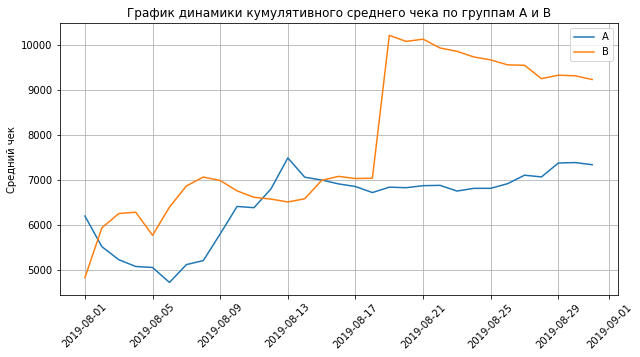

In [17]:
# график среднего чека группы А
fig, axes = plt.subplots(figsize=(10,5))
plt.plot(orders_A['date'], orders_A['revenue']/orders_A['orders'], label='A')

# график среднего чека группы B
plt.plot(orders_B['date'], orders_B['revenue']/orders_B['orders'], label='B')

plt.title('График динамики кумулятивного среднего чека по группам А и В')
plt.ylabel("Средний чек")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
<li>Средний чек в группе В тоже имеет резкий скачок 19 августа, значит, имеет место дорогостоящая покупка в эту дату.</li>
<li>Средний чек в группе А падал до 6 августа, затем отмечается рост, пик - 13 августа, затем становится равномерным до конца теста. Возможно, в группу А в первой половине теста попали небольшие заказы.</li>
<li>Начиная с 19 августа в группе B отмечается нисходящий тренд, размер среднего чека снижается.</li>
<li>В целом средний чек группы В выше, чем чек группы А. Исключение - 13 августа.</li>
    </div>


### график относительного изменения кумулятивного среднего чека группы B к группе A

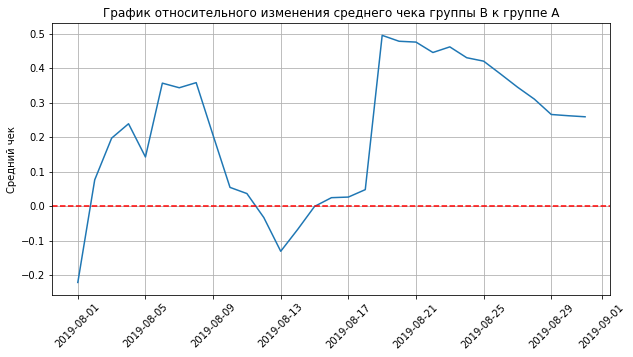

In [18]:
# объединение датафреймов
merge_cumulative = orders_A.merge(orders_B, on='date', how='left', suffixes=['A','B'])

# график относительного изменения кумулятивного среднего чека
fig, axes = plt.subplots(figsize=(10,5))
plt.plot(merge_cumulative['date'], 
         (merge_cumulative['revenueB']/merge_cumulative['ordersB'])\
         /(merge_cumulative['revenueA']/merge_cumulative['ordersA'])-1)

plt.axhline(y=0, color='red', linestyle='--')
plt.title('График относительного изменения среднего чека группы B к группе A')
plt.ylabel("Средний чек")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
<li>График неравномерен и нестабилен, в нескольких точках график различия между сегментами резко «скачет».</li> 
<li>13 августа резкое падение выручки в группе В, а 19 августа - резкий рост выручки в этой группе.</li> 
<li>В данных присутствуют выбросы и крупные заказы. Необходимо найти их и очистить данные, чтобы они не исказили результаты дальнейшего анализа.</li>
        </div>

### график кумулятивного среднего количества заказов на посетителя по группам

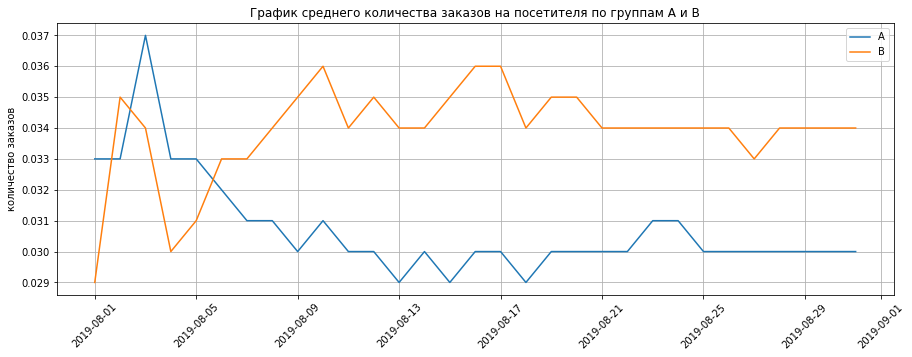

In [19]:
# график кумулятивного среднего количества заказов на посетителя группы А
fig, axes = plt.subplots(figsize=(15,5))
plt.plot(orders_A['date'], orders_A['conversion'], label='A')

# график кумулятивного среднего количества заказов на посетителя группы B
plt.plot(orders_B['date'], orders_B['conversion'], label='B')

plt.title('График среднего количества заказов на посетителя по группам А и В')
plt.ylabel("количество заказов")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(); 

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
<li>График имеет симметрию.</li>
<li>Среднее количество заказов на посетителя групп А и В имели колебания в первые 5 дней теста.</li> 
<li>В начале теста группа А показывала среднее количество заказов выше, чем группа В.</li>
<li>Но затем группа В вырвалась вперёд и зафиксировалась, а показатель группы А просел и также зафиксировался.</li>
<li>Среднее количество заказов на посетителя в группе А плавает в пределах 0,029 и до 0,031, в группе В - от 0.033 до 0.036.</li>
        </div>

### график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

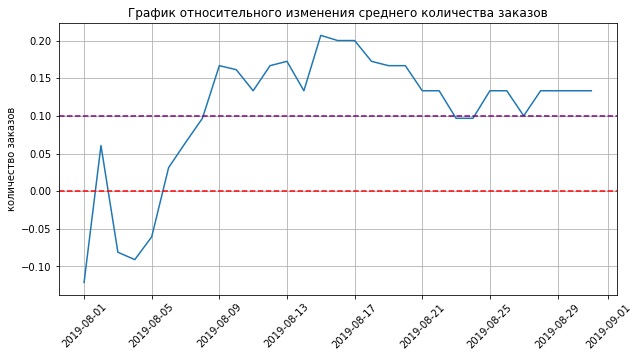

In [20]:
# график относительного изменения кумулятивного среднего количества заказов на посетителя
fig, axes = plt.subplots(figsize=(10,5))
plt.plot(merge_cumulative['date'], 
         (merge_cumulative['conversionB']/merge_cumulative['conversionA'])-1)

plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.1, color='purple', linestyle='--')
plt.title('График относительного изменения среднего количества заказов')
plt.ylabel("количество заказов")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
    Среднее количество заказов группы В почти с самого начала лидирует, исключение - 4 августа. Здесь отмечен резкий спад.<br>
В дальнейшем количество заказов группы В увеличивалось, а после 9 августа не опускалось ниже 10% прироста относительно количества заказов группы А. И колеблется в пределах 10-20%.<br>
     </div>

### точечный график количества заказов по пользователям

In [21]:
# создание датафрейма количества заказов по пользователям
orders_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_users.columns = ['user_id', 'orders']

print(orders_users.sort_values(by='orders', ascending=False).head(10)) 

         user_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


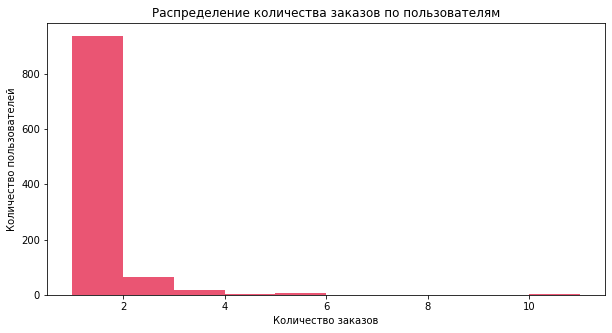

In [22]:
# гистограмма числа заказов по пользователям
fig, axes = plt.subplots(figsize=(10,5))
plt.hist(orders_users['orders'], bins=10, color='#e52b50', alpha=0.8) 
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.show()

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-3 заказами тоже значительна. 

In [23]:
# вывод статистических характеристик 
orders_users['orders'].describe()

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64

Сразу можно увидеть аномально большое число заказов - 11. Медиана равна 1. То есть в основном пользователи совершали 1 заказ. Из-за выбросов среднее отклонилось.

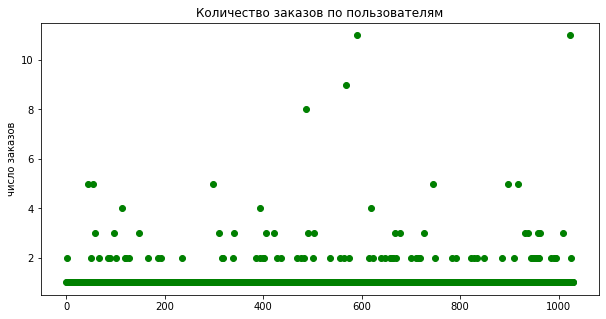

In [24]:
# построение диаграммы рассеяния 
fig, axes = plt.subplots(figsize=(10,5))
x_values = pd.Series(range(0,len(orders_users)))
plt.scatter(x_values, orders_users['orders'],color='green')
plt.ylabel(
    'число заказов')
plt.title(
    'Количество заказов по пользователям')
plt.show()

*Выводы подтверждаются: много пользователей с 2-3 заказами. Необходимо найти их точную долю, чтобы понять аномалии это или нет. Если их доля меньше 5%, то признаем их выбросами и исключим из исследования.*

Рассчитаем перцентили количества заказов на одного пользователя

In [25]:
# расчет перцентилей количества заказов на одного пользователя
np.percentile(orders_users['orders'], [90, 95, 99])

array([1., 2., 4.])

In [26]:
# создание границы числа заказов на одного пользователя
orders_anomal = round(np.percentile(orders_users['orders'], [90, 95, 99])[2])
orders_anomal

4

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
<li>Не более 5% пользователей оформляли больше 2 заказов. И 1% пользователей заказывал более 4 раз.</li> 
<li>Стоит выбрать <b>4 заказа</b> на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.</li>
         </div>

### точечный график стоимостей заказов

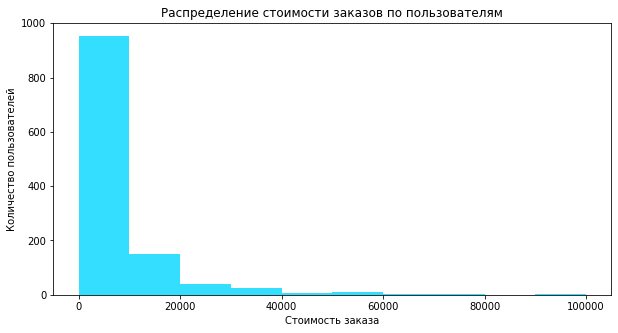

In [27]:
# гистограмма стоимостей заказов
fig, axes = plt.subplots(figsize=(10,5))
plt.hist(orders['revenue'], color='#00d6ff', range=(0, 100000), alpha=0.8) 
plt.title('Распределение стоимости заказов по пользователям')
plt.xlabel('Стоимость заказа')
plt.ylabel('Количество пользователей')
plt.show()

In [28]:
# вывод 3 разрядов после запятой 
pd.options.display.float_format ='{:,.3f}'.format

# вывод статистических характеристик 
orders['revenue'].describe()

count       1,197.000
mean        8,348.006
std        39,191.132
min            50.000
25%         1,220.000
50%         2,978.000
75%         8,290.000
max     1,294,500.000
Name: revenue, dtype: float64

В среднем пользователи совершают заказы на сумму до 20тыс., большинство покупателей заказывают на сумму до 10 тысяч. Но также есть заказы на сумму выше 20тысяч.
Однако есть заказ на 1.3млн. Это выброс, который сдвинул среднее, огромное значение среднеквадратичного отклонения говорит о сильном разбросе данных.

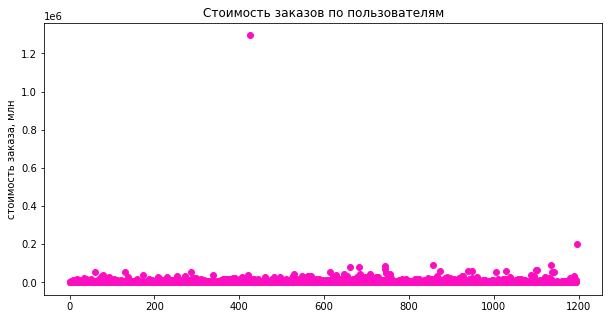

In [29]:
# построение диаграммы рассеяния 
fig, axes = plt.subplots(figsize=(10,5))
x_values = pd.Series(range(0,len(orders)))
plt.scatter(x_values, orders['revenue'],color='#fc0fc0')
plt.ylabel(
    'стоимость заказа, млн')
plt.title(
    'Стоимость заказов по пользователям')
plt.show()

Мы видим выброс - 1.3млн. Из-за этого все остальные данные слились. Построим график, исключив это значение.

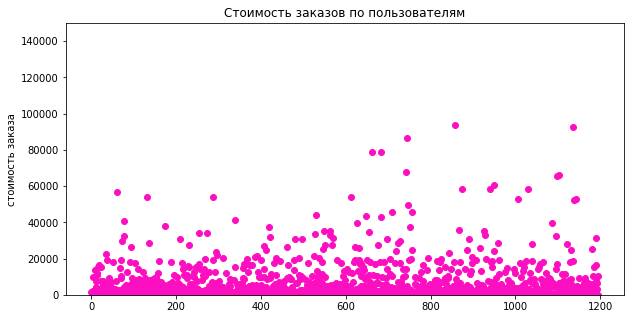

In [30]:
# построение диаграммы рассеяния 
fig, axes = plt.subplots(figsize=(10,5))
plt.ylim(0, 150000)
plt.scatter(x_values, orders['revenue'],color='#fc0fc0')
plt.ylabel(
    'стоимость заказа')
plt.title(
    'Стоимость заказов по пользователям')
plt.show()

Выводы подтверждаются: много пользователей сделали заказ на сумму до 20 тысяч. Но в данных есть заказы от 20-100 тысяч. Однако большинство всё-таки имеет меньшую выручку.
Необходимо найти их точную долю, чтобы понять аномалии это или нет. Если их доля меньше 5%, то признаем их выбросами и исключим из исследования.

Рассчитаем перцентили стоимости заказов

In [31]:
# расчет перцентилей стоимости заказов
np.percentile(orders['revenue'], [90, 95, 99])


array([18168. , 28000. , 58233.2])

In [32]:
# создание границы стоимости одного заказа
revenue_anomal = round(np.percentile(orders['revenue'], [90, 95, 99])[2])
revenue_anomal

58233

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
<li>Не более 5% пользователей оформляли заказ дороже 28 тысяч. И 1% пользователей совершил заказ на сумму более 58 тысяч.</li> 
<li>Стоит выбрать <b>58 тысяч</b> за верхнюю границу стоимости заказа, и отсеять аномальных пользователей по ней.</li>
         </div>

### статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

*Сформулируем две гипотезы:*  
**H_0**: различий в среднем количестве заказов на посетителя между группами по "сырым" данным нет

**H_a**: различия в среднем количестве заказов на посетителя между группами по "сырым" данным есть 

*Метод, который будем применять для A/B-тестирования - критерий Манна-Уитни. Он подходит, так как работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты.*

*Уровень статистической значимости примем: alpha = 0.05.*
  
*Посчитаем p-value, сравним его значение с alpha. Если p-value окажется меньше, то нулевую гипотезу отвергнем. В ином случае, данные не позволяют нам отвергнуть нулевую гипотезу.*

In [33]:
# создание таблицы с числом пользователей ежедневно группа А
visitors_daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_a.columns = ['date', 'visitorsA']

# создание таблицы с накоплением числа пользователей группа А
visitors_cummulative_a = visitors_daily_a.apply(
    lambda x: visitors_daily_a[visitors_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsA': 'sum'}), axis=1)
visitors_cummulative_a.columns = ['date', 'visitors_cummulat_A']

# создание таблицы с числом пользователей ежедневно группа В
visitors_daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_b.columns = ['date', 'visitorsB']

# создание таблицы с накоплением числа пользователей группа В
visitors_cummulative_b = visitors_daily_b.apply(
    lambda x: visitors_daily_b[visitors_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsB': 'sum'}), axis=1)
visitors_cummulative_b.columns = ['date', 'visitors_cummulat_B']


In [34]:
# создание таблицы с ежедневным числом заказов и выручкой группа А
orders_daily_a = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_a.columns = ['date', 'ordersA', 'revenueA']

# создание таблицы с кумулятивным числом заказов и выручкой группа А
orders_cummulative_a = orders_daily_a.apply(
    lambda x: orders_daily_a[orders_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'ordersA': 'sum', 'revenueA': 'sum'}
    ), axis=1).sort_values(by=['date'])

orders_cummulative_a.columns = ['date','orders_cummulat_A','revenue_cummulat_A']

# создание таблицы с ежедневным числом заказов и выручкой группа В
orders_daily_b = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_b.columns = ['date', 'ordersB', 'revenueB']

# создание таблицы с кумулятивным числом заказов и выручкой группа В
orders_cummulative_b = orders_daily_b.apply(
    lambda x: orders_daily_b[orders_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'ordersB': 'sum', 'revenueB': 'sum'}
    ),axis=1,).sort_values(by=['date'])

orders_cummulative_b.columns = ['date','orders_cummulat_B','revenue_cummulat_B']

In [35]:
# объединение всех таблиц в одну 
data = (orders_daily_a\
    .merge(orders_daily_b, left_on='date', right_on='date', how='left')
    .merge(orders_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(orders_cummulative_b, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_a, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_b, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_b, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersA,revenueA,ordersB,revenueB,orders_cummulat_A,revenue_cummulat_A,orders_cummulat_B,revenue_cummulat_B,visitorsA,visitorsB,visitors_cummulat_A,visitors_cummulat_B
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные, где для каждого пользователя, который заказывал хотя бы 1 раз, укажем число совершённых заказов. 

In [36]:
# создание таблиц с числом заказов, сделанных пользователем
# совершившим хотя бы 1 заказ 
# группы А и В

orders_by_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_A.columns = ['user_id', 'orders']

orders_by_users_B = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_B.columns = ['user_id', 'orders']

In [37]:
# создание таблиц с числом заказов для каждого пользователя в группах А и В
sampleA = pd.concat(
    [orders_by_users_A['orders'], pd.Series(
            0, index=np.arange(
                data['visitorsA'].sum() - len(orders_by_users_A['orders'])
                ),
            name='orders')],
    axis=0)

sampleB = pd.concat(
    [orders_by_users_B['orders'], pd.Series(
            0, index=np.arange(
                data['visitorsB'].sum() - len(orders_by_users_B['orders'])
            ),
            name='orders')],
    axis=0)

In [38]:
# функция проверки гипотезы
def check_hypothesis(df1, df2, num):
    alpha = .05
    results = st.mannwhitneyu(df1, df2)[1]
    print('p-value составляет ', "{0:.3f}".format(results))

    text = ['в среднем числе заказов групп A и B есть разница', 
            'в среднем чеке заказа групп A и B есть разница']
    text2 = ['различий в среднем числе заказов групп A и B нет', 
             'различий в среднем чеке заказа групп A и B нет']

    if results < alpha:
        print(f'Отвергаем нулевую гипотезу, {text[num]}.')
    else:
        print(f'Не можем отвергнуть нулевую гипотезу, {text2[num]}.')

    # расчет относительного прироста группы В к группе А
    print('Относительный прирост группы В к группе А составил {0:.2%}'\
          .format(df2.mean()/df1.mean()-1))

In [39]:
# проверка первой гипотезы
check_hypothesis(sampleA, sampleB, 0)

p-value составляет  0.017
Отвергаем нулевую гипотезу, в среднем числе заказов групп A и B есть разница.
Относительный прирост группы В к группе А составил 13.81%


<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
<li>Первое число — <b>p-value = 0.017</b> меньше 0.05.</li>
<li>Такое значение p-value говорит нам о том, что вероятность случайного различия количества заказов между группами мала и составляет всего 1.7%. Значит, <b>разница количеством заказов между группами по «сырым» данным статистически значима</b>, не вызвана "шумом".</li> 
<li>Значит, <b>нулевую гипотезу</b> о том, что статистически значимых различий в среднем числе заказов между группами по «сырым» данным нет, <b>отвергаем</b>.</li> 
<li>Относительный прирост количества заказов группы B равен <b>13.8%</b> — второе число в выводе. То есть группа В показывает лучшие показатели количества заказов, чем группа А.</li>
    </div>

### статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

*Сформулируем две гипотезы:*  
**H_0**: различий в среднем чеке заказа между группами по "сырым" данным нет

**H_a**: различия в среднем чеке заказа между группами по "сырым" данным есть 

*Метод, который будем применять для A/B-тестирования - критерий Манна-Уитни. Он подходит, так как работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты.*

*Уровень статистической значимости примем: alpha = 0.05.*
  
*Посчитаем p-value, сравним его значение с alpha. Если p-value окажется меньше, то нулевую гипотезу отвергнем. В ином случае, данные не позволяют нам отвергнуть нулевую гипотезу.*

In [40]:
# проверка второй гипотезы
check_hypothesis(orders[orders['group']=='A']['revenue'], 
                 orders[orders['group']=='B']['revenue'], 1)

p-value составляет  0.729
Не можем отвергнуть нулевую гипотезу, различий в среднем чеке заказа групп A и B нет.
Относительный прирост группы В к группе А составил 25.87%


<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
<li>Первое число — <b>p-value = 0.729</b> больше 0.05.</li>
<li>Такое значение p-value говорит нам о том, что вероятность случайного различия среднего чека между группами велика и составляет 72.9%. Значит, <b>разница среднего чека между группами по «сырым» данным статистически незначима</b>, вызвана "шумом".</li> 
<li>Значит, <b>нулевую гипотезу</b> о том, что статистически значимых различий в среднем числе заказов между группами по «сырым» данным нет,<b>у нас нет оснований отвергнуть</b>.</li> 
<li>Относительный прирост среднего чека группы B равен <b>25.87%</b> — второе число в выводе. То есть группа В снова показывает лучшие показатели, чем группа А.</li>
<li>Из-за того, что критерий Манна-Уитни нечувствителен к выбросам, несмотря на разницу в средних, нулевая гипотеза подтвердилась.</li>
    </div>

### статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

*Сформулируем две гипотезы:*  
**H_0**: различий в среднем количестве заказов на посетителя между группами по "очищенным" данным нет

**H_a**: различия в среднем количестве заказов на посетителя между группами по "очищенным" данным есть 

*Метод, который будем применять для A/B-тестирования - критерий Манна-Уитни. Он подходит, так как работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты.*

*Уровень статистической значимости примем: alpha = 0.05.*
  
*Посчитаем p-value, сравним его значение с alpha. Если p-value окажется меньше, то нулевую гипотезу отвергнем. В ином случае, данные не позволяют нам отвергнуть нулевую гипотезу.*

*Так как ранее мы выявили выбросы в данных, проведем повторную проверку гипотез по "чистым" данным, исключив аномалии из выборок.*  
*Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 58 233 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% пользователей с дорогими заказами.*

In [41]:
# таблица id-пользователей, совершивших больше 4 заказов
users_many_orders = pd.concat(
    [
        orders_by_users_A[orders_by_users_A['orders'] > orders_anomal]['user_id'],
        orders_by_users_B[orders_by_users_B['orders'] > orders_anomal]['user_id'],
    ],
    axis=0,
)

# таблица id-пользователей, совершивших заказ дороже 58тыс
users_expensive_orders = orders[orders['revenue'] > revenue_anomal]['visitor_id']

# общая таблица с id аномальных пользователей
anomal_users = (
    pd.concat([users_many_orders, users_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# количество аномальных пользователей
print(anomal_users.shape[0])
anomal_users.head(5)

15


1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
dtype: int64

Всего в наших данных 15 аномальных пользователей. Исключим их id из анализа для расчета статистической значимости. 

In [42]:
# создание таблиц с числом заказов для каждого пользователя в группах А и В 
# без аномальных пользователей
sample_filtred_A = pd.concat(
    [orders_by_users_A
     [np.logical_not(orders_by_users_A['user_id'].isin(anomal_users))]['orders'], 
     pd.Series(
            0, index=np.arange(
                data['visitorsA'].sum() - len(orders_by_users_A['orders'])
                ),
            name='orders')],
    axis=0)

sample_filtred_B = pd.concat(
    [orders_by_users_B
     [np.logical_not(orders_by_users_B['user_id'].isin(anomal_users))]['orders'], 
     pd.Series(
            0, index=np.arange(
                data['visitorsB'].sum() - len(orders_by_users_B['orders'])
            ),
            name='orders')],
    axis=0)

Узнаем, как действия пользователей повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. 

In [43]:
# проверка третьей гипотезы
check_hypothesis(sample_filtred_A, sample_filtred_B, 0)

p-value составляет  0.014
Отвергаем нулевую гипотезу, в среднем числе заказов групп A и B есть разница.
Относительный прирост группы В к группе А составил 15.33%


<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
<li>Первое число — <b>p-value = 0.014</b> меньше 0.05.</li>
<li>Такое значение p-value говорит нам о том, что вероятность случайного различия количества заказов между группами мала и составляет всего 1.4%. Значит, <b>разница числа заказов между группами по «очищенным» данным статистически значима</b>, не вызвана "шумом".</li> 
<li>Значит, <b>нулевую гипотезу</b> о том, что статистически значимых различий в среднем числе заказов между группами по «очищенным» данным нет, <b>отвергаем</b>.</li> 
<li>Относительный прирост количества заказов группы B равен <b>15.33%</b> — второе число в выводе. То есть группа В показывает лучшие показатели числа заказов, чем группа А.</li>
<li>Результаты по среднему количеству заказов практически не изменились после "очистки" данных, аномалии не сильно исказили результат. Значение p-value уменьшилось, а прирост количества заказов увеличился.</li>
    </div>

### статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

*Сформулируем две гипотезы:*  
**H_0**: различий в среднем чеке заказа между группами по "очищенным" данным нет

**H_a**: различия в среднем чеке заказа между группами по "очищенным" данным есть

*Метод, который будем применять для A/B-тестирования - критерий Манна-Уитни. Он подходит, так как работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты.*

*Уровень статистической значимости примем: alpha = 0.05.*
  
*Посчитаем p-value, сравним его значение с alpha. Если p-value окажется меньше, то нулевую гипотезу отвергнем. В ином случае, данные не позволяют нам отвергнуть нулевую гипотезу.*

In [44]:
# проверка четвертой гипотезы
check_hypothesis(orders[np.logical_and(
                       np.logical_not(orders['visitor_id'].isin(anomal_users)), 
                                      orders['group']=='A')]['revenue'],
                 orders[np.logical_and(
                        np.logical_not(orders['visitor_id'].isin(anomal_users)), 
                                       orders['group']=='B')]['revenue'], 
                 1)

p-value составляет  0.851
Не можем отвергнуть нулевую гипотезу, различий в среднем чеке заказа групп A и B нет.
Относительный прирост группы В к группе А составил -0.57%


<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
<li>Первое число — <b>p-value = 0.851</b> больше 0.05.</li>
<li>Такое значение p-value говорит нам о том, что вероятность случайного различия среднего чека между группами велика и составляет 85.1%. Значит, <b>разница среднего чека между группами по «очищенным» данным статистически незначима</b>, вызвана "шумом".</li> 
<li>Значит, <b>нулевую гипотезу</b> о том, что статистически значимых различий в среднем числе заказов между группами по «очищенным» данным нет,<b>у нас нет оснований отвергнуть</b>.</li> 
<li>Относительный проигрыш среднего чека группы B равен <b>0.57%</b> — второе число в выводе. То есть группа В показывает средние чеки чуть ниже, чем группа А.</li>
<li>Результаты по среднему чеку изменились после "очистки" данных. Значение p-value увеличилось, а средний чек по группе В стал практически равен среднему чеку группы А.</li>
    </div>

## Общий вывод

<p></p>

<div style="border:solid pink 5px; padding: 20px">
    Итак, нами был получены и изучены данные о 9 гипотезах и результатах проведенного А/В теста за август 2019г.<br>
    Прежде чем дать ответ на поставленные перед нами вопросы, был проведен ряд манипуляций с данными.<br>  
    Названия колонок были приведены к единому стилю, данные приведены к корректному типу, строки были проверены на наличие пропусков и дубликатов.<br>   
    Был анализирован период с 01/08/2019-31/08/2019.<br>
    <br>
<b><span style="color:#c71585">Приоритизация гипотез:</span></b>
<li>Из списка, предоставленных отделом Маркетинга, гипотез следует в первую очередь протестировать такие гипотезы, как: <b>0, 2, 6, 7, 8</b>. Последовательность их тестирования будет меняться в зависимости от того, насколько важен охват, то есть число пользователей, которых данное изменение затронет.</li>
<li>Если <b>охват важен</b>, то порядок такой:<br>
    - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок<br>
    - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа<br>
    - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей<br>
    - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию<br>
    </li>
<li>Если <b>охват роли не играет</b>, то порядок такой:<br>
    - Запустить акцию, дающую скидку на товар в день рождения<br>	
    - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей<br>
    - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок<br>
    - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию<br>
    </li>
    
<b><span style="color:#c71585">Анализ А/В теста:</span></b>    
    <li>Нет статистически значимого различия по среднему количеству заказов между группами ни по «сырым», ни по данным после фильтрации аномалий;</li>
    <li>По среднему чеку между группами есть статистически значимое различие по «сырым» и по данным после фильтрации аномалий;</li>
    <li>Графики относительного изменения кумулятивного среднего чека и числа заказов, а также выручки стабильно демонстрируют лидерство группы В.</li>
    <li><b>Исходя из обнаруженных фактов, тест следует остановить и зафиксировать победу группы В</b>. Выручка у сегмента В выше выручки группы А на протяжении всего теста, среднее количество заказов на посетителя у группы В больше. Относительный прирост количества заказов группы B равен 15.33% по "очищенным" данным. </li>
</div>